In [25]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

In [26]:
df = pd.read_csv('cardiovascular-disease-death-rates-by-age.csv')

df.head(10)

,Entity,Code,Year,"Under-5s (per 100,000)","All ages (per 100,000)","70+ years old (per 100,000)","50-69 years old (per 100,000)","Age-standardized (per 100,000)","5-14 years old (per 100,000)","15-49 years old (per 100,000)"
0,Afghanistan,AFG,1990,12.412,464.684,6221.633,1611.932,747.111,2.530,121.847
1,Afghanistan,AFG,1991,11.272,451.804,6212.581,1619.123,746.567,2.408,115.404
2,Afghanistan,AFG,1992,9.198,393.832,6227.449,1630.050,749.069,2.312,100.125
3,Afghanistan,AFG,1993,8.984,349.917,6261.372,1651.750,755.922,2.367,90.659
4,Afghanistan,AFG,1994,9.578,341.816,6316.085,1684.617,766.066,2.406,89.965
5,Afghanistan,AFG,1995,9.440,330.629,6318.349,1696.651,768.555,2.404,87.670
6,Afghanistan,AFG,1996,8.816,319.578,6311.387,1707.165,771.332,2.298,87.263
7,Afghanistan,AFG,1997,8.428,310.955,6306.053,1720.017,774.388,2.239,87.939
8,Afghanistan,AFG,1998,8.112,304.020,6296.255,1733.143,776.168,2.170,88.930
9,Afghanistan,AFG,1999,8.015,305.391,6287.279,1748.554,778.023,2.121,92.911


In [27]:
df = df.rename(columns={'Under-5s (per 100,000)':'<5',
                        '5-14 years old (per 100,000)':'5-14',
                        '15-49 years old (per 100,000)':'15-49',
                        '50-69 years old (per 100,000)':'50-69',
                        '70+ years old (per 100,000)':'70+'})

df.head()

,Entity,Code,Year,<5,"All ages (per 100,000)",70+,50-69,"Age-standardized (per 100,000)",5-14,15-49
0,Afghanistan,AFG,1990,12.412,464.684,6221.633,1611.932,747.111,2.530,121.847
1,Afghanistan,AFG,1991,11.272,451.804,6212.581,1619.123,746.567,2.408,115.404
2,Afghanistan,AFG,1992,9.198,393.832,6227.449,1630.050,749.069,2.312,100.125
3,Afghanistan,AFG,1993,8.984,349.917,6261.372,1651.750,755.922,2.367,90.659
4,Afghanistan,AFG,1994,9.578,341.816,6316.085,1684.617,766.066,2.406,89.965


In [28]:
df.head()

,Entity,Code,Year,<5,"All ages (per 100,000)",70+,50-69,"Age-standardized (per 100,000)",5-14,15-49
0,Afghanistan,AFG,1990,12.412,464.684,6221.633,1611.932,747.111,2.530,121.847
1,Afghanistan,AFG,1991,11.272,451.804,6212.581,1619.123,746.567,2.408,115.404
2,Afghanistan,AFG,1992,9.198,393.832,6227.449,1630.050,749.069,2.312,100.125
3,Afghanistan,AFG,1993,8.984,349.917,6261.372,1651.750,755.922,2.367,90.659
4,Afghanistan,AFG,1994,9.578,341.816,6316.085,1684.617,766.066,2.406,89.965


In [29]:
df_1 = df.groupby(['Year'], as_index=False).agg({'<5':'mean', 
                                                 '5-14':'mean', 
                                                 '15-49':'mean',
                                                 '50-69':'mean',
                                                 '70+':'mean'})

print(df_1.shape)

(28, 6)


In [30]:
df_1.head()

,Year,<5,5-14,15-49,50-69,70+
0,1990,12.009,2.448,40.458,634.624,3696.931
1,1991,11.600,2.406,40.405,631.477,3675.231
2,1992,11.208,2.368,40.691,632.195,3669.296
3,1993,10.855,2.318,41.295,637.517,3677.783
4,1994,10.522,2.275,41.832,640.116,3656.574


In [31]:
df_1 = pd.melt(df_1, 
               id_vars=['Year'], 
               var_name='Age',
               value_name='Total')

df_1.head(10)

,Year,Age,Total
0,1990,<5,12.009
1,1991,<5,11.600
2,1992,<5,11.208
3,1993,<5,10.855
4,1994,<5,10.522
5,1995,<5,10.112
6,1996,<5,9.743
7,1997,<5,9.416
8,1998,<5,9.095
9,1999,<5,8.828


In [32]:
print(df_1.shape)

(140, 3)


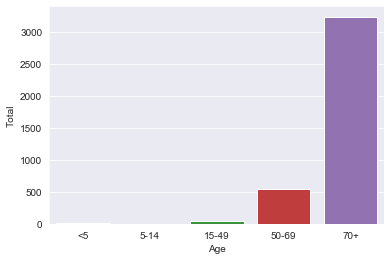

In [33]:
sns.barplot(x='Age', y='Total', data=df_1, ci=None)
plt.show()

In [34]:
df_1.to_csv('cleaned_heart_and_aging.csv', index=None)